In [ ]:
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from tensorflow.keras.optimizers import SGD, Adam
from keras.models import Model, Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from keras.models import load_model
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
# Function to perform onehot encoding of labels
def onehotEncodeLabels(trainY, testY):
  # integer encode
  label_encoder = LabelEncoder()
  int_trainY = label_encoder.fit_transform(trainY.reshape(-1))
  int_testY = label_encoder.transform(testY.reshape(-1))

  # binary encode
  onehot_encoder = OneHotEncoder(sparse=False)
  int_trainY = int_trainY.reshape(len(int_trainY), 1)
  int_testY = int_testY.reshape(len(int_testY), 1)

  trainYEncoded = onehot_encoder.fit_transform(int_trainY)
  testYEncoded = onehot_encoder.transform(int_testY)
  return trainYEncoded, testYEncoded

# Function for plotting accuracy and loss curve
def plotGraphs(history):
  # Plotting history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  # Plotting history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

# Function for MLP Model (ANN)
def visNeuralNetwork(Xtrain, Ytrain, Xtest, Ytest, h1, h2, h3, epochs):
  # Build MLP
  model = Sequential()
  model.add(Dense(h1, input_dim=Xtrain.shape[1], activation='relu'))
  model.add(Dense(h2, activation='relu'))
  model.add(Dense(h3, activation='relu'))
  # Output Layer
  model.add(Dense(264, activation='softmax'))

  # Model compiled using SGD Optimizer
  model.compile(loss='categorical_crossentropy', optimizer = SGD(learning_rate=0.01, decay=0.0001, momentum=0.9), metrics = ['accuracy'])
  
  # Model Training
  history = model.fit(Xtrain, Ytrain, epochs = epochs, batch_size = 64, validation_data = (Xtest, Ytest), shuffle=True)

  # Plotting accuracy and loss curve
  plotGraphs(history)

  # return model
  return model

**Stratified K-fold Cross Validation for Feature Concatenation - Overlap Data with PCA (0.98)**

================================== K Fold : 0 ==================================

Shape of Visual Features:
Training Data Shape   = (260761, 2115)
Training Labels Shape = (260761, 264)
Testing Data Shape   = (65191, 2115)
Testing Labels Shape = (65191, 264)

Epoch 1/20
4075/4075 [==============================] - 39s 9ms/step - loss: 2.4157 - accuracy: 0.4805 - val_loss: 1.5620 - val_accuracy: 0.6393
Epoch 2/20
4075/4075 [==============================] - 35s 9ms/step - loss: 1.0796 - accuracy: 0.7423 - val_loss: 1.0405 - val_accuracy: 0.7529
Epoch 3/20
4075/4075 [==============================] - 34s 8ms/step - loss: 0.5814 - accuracy: 0.8545 - val_loss: 0.8205 - val_accuracy: 0.8012
Epoch 4/20
4075/4075 [==============================] - 34s 8ms/step - loss: 0.3078 - accuracy: 0.9203 - val_loss: 0.6990 - val_accuracy: 0.8331
Epoch 5/20
4075/4075 [==============================] - 34s 8ms/step - loss: 0.1561 - accuracy: 0.9607 - val_loss: 0.6359 - val_accuracy: 0.8501
Epoch 6/20
4075/

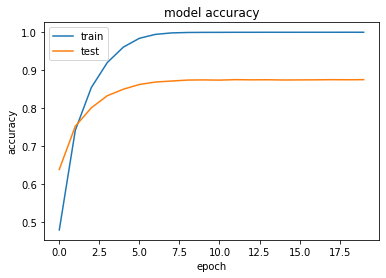

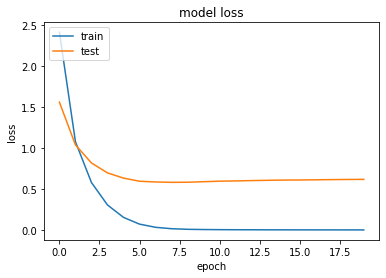

In [ ]:
i=0
print("================================== K Fold :",i,"==================================")

# Loading and concatenating deep features of 4 Models (VGG16 + ResNet50 + ResNet101 + DenseNet121) and labels of Fold-0
trainData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet101_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/VGG16_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/DenseNet121_PCA/trainFeatures_128_" + str(i) + ".npy")), axis = 1)

trainLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/trainLabels_128_" + str(i) + ".npy")

testData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet101_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/VGG16_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/DenseNet121_PCA/testFeatures_128_" + str(i) + ".npy")), axis = 1)

testLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/testLabels_128_" + str(i) + ".npy")

print("\nShape of Visual Features:")
print("Training Data Shape   = {}".format(trainData.shape))
print("Training Labels Shape = {}".format(trainLabels.shape))
print("Testing Data Shape   = {}".format(testData.shape))
print("Testing Labels Shape = {}\n".format(testLabels.shape))

# Model Training for Fold-0
visModel = visNeuralNetwork(trainData, trainLabels, testData, testLabels, 2048, 1024, 512, 20)

# Saving Trained Model of Fold-0
visModel.save("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/DCNN Models/CBC DCNN_CV/EnsembleModel_Visual/EnsembleModel_Overlap_PCA_128_" + str(i) + ".h5")

================================== K Fold : 1 ==================================

Shape of Visual Features:
Training Data Shape   = (260761, 2115)
Training Labels Shape = (260761, 264)
Testing Data Shape   = (65191, 2115)
Testing Labels Shape = (65191, 264)

Epoch 1/20
4075/4075 [==============================] - 39s 9ms/step - loss: 2.4056 - accuracy: 0.4825 - val_loss: 1.5796 - val_accuracy: 0.6395
Epoch 2/20
4075/4075 [==============================] - 36s 9ms/step - loss: 1.0708 - accuracy: 0.7430 - val_loss: 1.0624 - val_accuracy: 0.7483
Epoch 3/20
4075/4075 [==============================] - 34s 8ms/step - loss: 0.5743 - accuracy: 0.8547 - val_loss: 0.8365 - val_accuracy: 0.8008
Epoch 4/20
4075/4075 [==============================] - 34s 8ms/step - loss: 0.3053 - accuracy: 0.9215 - val_loss: 0.7124 - val_accuracy: 0.8299
Epoch 5/20
4075/4075 [==============================] - 35s 9ms/step - loss: 0.1556 - accuracy: 0.9612 - val_loss: 0.6386 - val_accuracy: 0.8495
Epoch 6/20
4075/

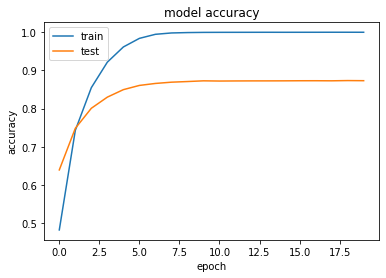

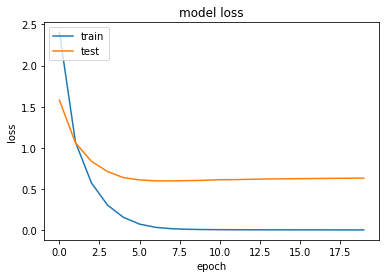

In [ ]:
i=1
print("================================== K Fold :",i,"==================================")

# Loading and concatenating deep features of 4 Models (VGG16 + ResNet50 + ResNet101 + DenseNet121) and labels of Fold-1
trainData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet101_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/VGG16_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/DenseNet121_PCA/trainFeatures_128_" + str(i) + ".npy")), axis = 1)

trainLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/trainLabels_128_" + str(i) + ".npy")

testData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet101_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/VGG16_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/DenseNet121_PCA/testFeatures_128_" + str(i) + ".npy")), axis = 1)

testLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/testLabels_128_" + str(i) + ".npy")

print("\nShape of Visual Features:")
print("Training Data Shape   = {}".format(trainData.shape))
print("Training Labels Shape = {}".format(trainLabels.shape))
print("Testing Data Shape   = {}".format(testData.shape))
print("Testing Labels Shape = {}\n".format(testLabels.shape))

# Model Training for Fold-1
visModel = visNeuralNetwork(trainData, trainLabels, testData, testLabels, 2048, 1024, 512, 20)

# Saving Trained Model of Fold-1
visModel.save("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/DCNN Models/CBC DCNN_CV/EnsembleModel_Visual/EnsembleModel_Overlap_PCA_128_" + str(i) + ".h5")

================================== K Fold : 2 ==================================

Shape of Visual Features:
Training Data Shape   = (260762, 2116)
Training Labels Shape = (260762, 264)
Testing Data Shape   = (65190, 2116)
Testing Labels Shape = (65190, 264)

Epoch 1/20
4075/4075 [==============================] - 38s 9ms/step - loss: 2.4092 - accuracy: 0.4818 - val_loss: 1.5595 - val_accuracy: 0.6421
Epoch 2/20
4075/4075 [==============================] - 36s 9ms/step - loss: 1.0681 - accuracy: 0.7447 - val_loss: 1.0538 - val_accuracy: 0.7482
Epoch 3/20
4075/4075 [==============================] - 36s 9ms/step - loss: 0.5718 - accuracy: 0.8560 - val_loss: 0.8223 - val_accuracy: 0.8024
Epoch 4/20
4075/4075 [==============================] - 35s 9ms/step - loss: 0.3044 - accuracy: 0.9210 - val_loss: 0.7165 - val_accuracy: 0.8300
Epoch 5/20
4075/4075 [==============================] - 35s 9ms/step - loss: 0.1531 - accuracy: 0.9621 - val_loss: 0.6429 - val_accuracy: 0.8477
Epoch 6/20
4075/

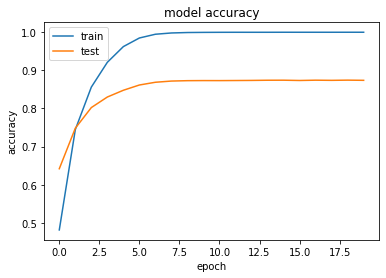

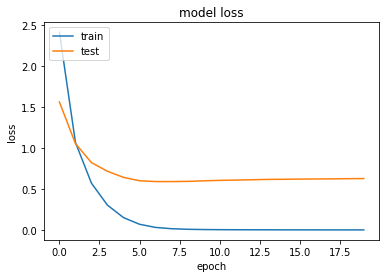

In [ ]:
i=2
print("================================== K Fold :",i,"==================================")

# Loading and concatenating deep features of 4 Models (VGG16 + ResNet50 + ResNet101 + DenseNet121) and labels of Fold-2
trainData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet101_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/VGG16_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/DenseNet121_PCA/trainFeatures_128_" + str(i) + ".npy")), axis = 1)

trainLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/trainLabels_128_" + str(i) + ".npy")

testData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet101_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/VGG16_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/DenseNet121_PCA/testFeatures_128_" + str(i) + ".npy")), axis = 1)

testLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/testLabels_128_" + str(i) + ".npy")

print("\nShape of Visual Features:")
print("Training Data Shape   = {}".format(trainData.shape))
print("Training Labels Shape = {}".format(trainLabels.shape))
print("Testing Data Shape   = {}".format(testData.shape))
print("Testing Labels Shape = {}\n".format(testLabels.shape))

# Model Training for Fold-2
visModel = visNeuralNetwork(trainData, trainLabels, testData, testLabels, 2048, 1024, 512, 20)

# Saving Trained Model of Fold-2
visModel.save("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/DCNN Models/CBC DCNN_CV/EnsembleModel_Visual/EnsembleModel_Overlap_PCA_128_" + str(i) + ".h5")

================================== K Fold : 3 ==================================

Shape of Visual Features:
Training Data Shape   = (260762, 2115)
Training Labels Shape = (260762, 264)
Testing Data Shape   = (65190, 2115)
Testing Labels Shape = (65190, 264)

Epoch 1/20
4075/4075 [==============================] - 38s 9ms/step - loss: 2.4269 - accuracy: 0.4792 - val_loss: 1.5910 - val_accuracy: 0.6337
Epoch 2/20
4075/4075 [==============================] - 35s 9ms/step - loss: 1.0860 - accuracy: 0.7402 - val_loss: 1.0712 - val_accuracy: 0.7464
Epoch 3/20
4075/4075 [==============================] - 35s 8ms/step - loss: 0.5864 - accuracy: 0.8525 - val_loss: 0.8299 - val_accuracy: 0.8017
Epoch 4/20
4075/4075 [==============================] - 34s 8ms/step - loss: 0.3138 - accuracy: 0.9189 - val_loss: 0.7156 - val_accuracy: 0.8297
Epoch 5/20
4075/4075 [==============================] - 34s 8ms/step - loss: 0.1590 - accuracy: 0.9599 - val_loss: 0.6473 - val_accuracy: 0.8484
Epoch 6/20
4075/

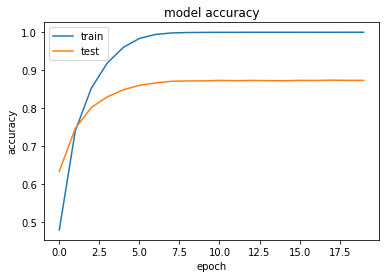

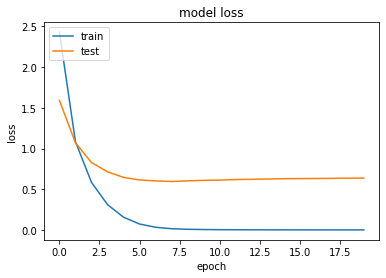

In [ ]:
i=3
print("================================== K Fold :",i,"==================================")

# Loading and concatenating deep features of 4 Models (VGG16 + ResNet50 + ResNet101 + DenseNet121) and labels of Fold-3
trainData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet101_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/VGG16_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/DenseNet121_PCA/trainFeatures_128_" + str(i) + ".npy")), axis = 1)

trainLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/trainLabels_128_" + str(i) + ".npy")

testData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet101_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/VGG16_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/DenseNet121_PCA/testFeatures_128_" + str(i) + ".npy")), axis = 1)

testLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/testLabels_128_" + str(i) + ".npy")

print("\nShape of Visual Features:")
print("Training Data Shape   = {}".format(trainData.shape))
print("Training Labels Shape = {}".format(trainLabels.shape))
print("Testing Data Shape   = {}".format(testData.shape))
print("Testing Labels Shape = {}\n".format(testLabels.shape))

# Model Training for Fold-3
visModel = visNeuralNetwork(trainData, trainLabels, testData, testLabels, 2048, 1024, 512, 20)

# Saving Trained Model of Fold-3
visModel.save("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/DCNN Models/CBC DCNN_CV/EnsembleModel_Visual/EnsembleModel_Overlap_PCA_128_" + str(i) + ".h5")

================================== K Fold : 4 ==================================

Shape of Visual Features:
Training Data Shape   = (260762, 2116)
Training Labels Shape = (260762, 264)
Testing Data Shape   = (65190, 2116)
Testing Labels Shape = (65190, 264)

Epoch 1/20
4075/4075 [==============================] - 37s 9ms/step - loss: 2.4167 - accuracy: 0.4808 - val_loss: 1.5741 - val_accuracy: 0.6392
Epoch 2/20
4075/4075 [==============================] - 35s 9ms/step - loss: 1.0765 - accuracy: 0.7429 - val_loss: 1.0637 - val_accuracy: 0.7491
Epoch 3/20
4075/4075 [==============================] - 34s 8ms/step - loss: 0.5767 - accuracy: 0.8549 - val_loss: 0.8252 - val_accuracy: 0.8016
Epoch 4/20
4075/4075 [==============================] - 35s 9ms/step - loss: 0.3071 - accuracy: 0.9200 - val_loss: 0.7069 - val_accuracy: 0.8321
Epoch 5/20
4075/4075 [==============================] - 35s 9ms/step - loss: 0.1558 - accuracy: 0.9612 - val_loss: 0.6383 - val_accuracy: 0.8509
Epoch 6/20
4075/

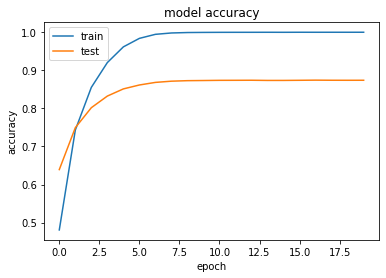

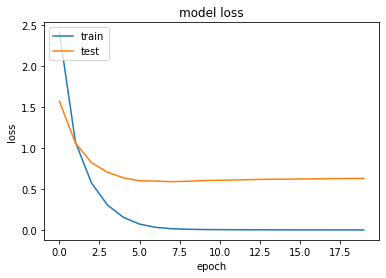

In [ ]:
i=4
print("================================== K Fold :",i,"==================================")

# Loading and concatenating deep features of 4 Models (VGG16 + ResNet50 + ResNet101 + DenseNet121) and labels of Fold-4
trainData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet101_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/VGG16_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/DenseNet121_PCA/trainFeatures_128_" + str(i) + ".npy")), axis = 1)

trainLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/trainLabels_128_" + str(i) + ".npy")

testData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet101_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/VGG16_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/DenseNet121_PCA/testFeatures_128_" + str(i) + ".npy")), axis = 1)

testLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/testLabels_128_" + str(i) + ".npy")

print("\nShape of Visual Features:")
print("Training Data Shape   = {}".format(trainData.shape))
print("Training Labels Shape = {}".format(trainLabels.shape))
print("Testing Data Shape   = {}".format(testData.shape))
print("Testing Labels Shape = {}\n".format(testLabels.shape))

# Model Training for Fold-4
visModel = visNeuralNetwork(trainData, trainLabels, testData, testLabels, 2048, 1024, 512, 20)

# Saving Trained Model of Fold-4
visModel.save("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/DCNN Models/CBC DCNN_CV/EnsembleModel_Visual/EnsembleModel_Overlap_PCA_128_" + str(i) + ".h5")

**Training & Testing Accuracies and Classification Reports**

In [ ]:
i=0
print("================================== K Fold :",i,"==================================\n")

# Loading and concatenating deep features of 4 Models (VGG16 + ResNet50 + ResNet101 + DenseNet121) and labels of Fold-0
trainData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet101_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/VGG16_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/DenseNet121_PCA/trainFeatures_128_" + str(i) + ".npy")), axis = 1)

trainLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/trainLabels_128_" + str(i) + ".npy")

testData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet101_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/VGG16_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/DenseNet121_PCA/testFeatures_128_" + str(i) + ".npy")), axis = 1)

testLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/testLabels_128_" + str(i) + ".npy")

# Loading Model of Fold-0
visModel = load_model("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/DCNN Models/CBC DCNN_CV/EnsembleModel_Visual/EnsembleModel_Overlap_PCA_128_" + str(i) + ".h5")

# Calculating Training and Testing Accuracy for Fold-0
_, trainAccuracy = visModel.evaluate(trainData, trainLabels)
del trainData, trainLabels

_, testAccuracy = visModel.evaluate(testData, testLabels)

print("\nTraining Accuracy = {}%".format(trainAccuracy*100))
print("Testing Accuracy = {}%".format(testAccuracy*100))

# Predicting Test labels for Fold-0
predictedTestLabels = visModel.predict(testData)

# Printing Classification Report for Fold-0
print("\nClassification Report: ")
print(classification_report(testLabels, np.round(predictedTestLabels)))

del testData, testLabels, predictedTestLabels

================================== K Fold : 0 ==================================

2038/2038 [==============================] - 13s 6ms/step - loss: 0.6200 - accuracy: 0.8752

Training Accuracy = 99.9769926071167%
Testing Accuracy = 87.51514554023743%

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       402
           1       0.91      0.83      0.87        76
           2       0.93      0.87      0.90       171
           3       0.93      0.87      0.90       352
           4       0.92      0.88      0.90       370
           5       0.90      0.79      0.84       122
           6       0.83      0.87      0.85       135
           7       0.92      0.88      0.90       399
           8       0.93      0.90      0.92       437
           9       0.76      0.72      0.74        36
          10       0.96      0.96      0.96       294
          11       0.94      0.89      0.92       238
          12       0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
i=1
print("================================== K Fold :",i,"==================================\n")

# Loading and concatenating deep features of 4 Models (VGG16 + ResNet50 + ResNet101 + DenseNet121) and labels of Fold-1
trainData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet101_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/VGG16_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/DenseNet121_PCA/trainFeatures_128_" + str(i) + ".npy")), axis = 1)

trainLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/trainLabels_128_" + str(i) + ".npy")

testData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet101_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/VGG16_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/DenseNet121_PCA/testFeatures_128_" + str(i) + ".npy")), axis = 1)

testLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/testLabels_128_" + str(i) + ".npy")

# Loading Model of Fold-1
visModel = load_model("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/DCNN Models/CBC DCNN_CV/EnsembleModel_Visual/EnsembleModel_Overlap_PCA_128_" + str(i) + ".h5")

# Calculating Training and Testing Accuracy for Fold-1
_, trainAccuracy = visModel.evaluate(trainData, trainLabels)
del trainData, trainLabels

_, testAccuracy = visModel.evaluate(testData, testLabels)

print("\nTraining Accuracy = {}%".format(trainAccuracy*100))
print("Testing Accuracy = {}%".format(testAccuracy*100))

# Predicting Test labels for Fold-1
predictedTestLabels = visModel.predict(testData)

# Printing Classification Report for Fold-1
print("\nClassification Report: ")
print(classification_report(testLabels, np.round(predictedTestLabels)))

del testData, testLabels, predictedTestLabels

================================== K Fold : 1 ==================================

2038/2038 [==============================] - 18s 9ms/step - loss: 0.6328 - accuracy: 0.8729

Training Accuracy = 99.97814297676086%
Testing Accuracy = 87.29272484779358%

Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       402
           1       0.96      0.93      0.95        75
           2       0.90      0.88      0.89       172
           3       0.90      0.89      0.89       352
           4       0.90      0.89      0.90       370
           5       0.94      0.84      0.88       122
           6       0.90      0.84      0.87       135
           7       0.93      0.87      0.90       399
           8       0.94      0.92      0.93       437
           9       0.79      0.86      0.83        36
          10       0.95      0.96      0.96       294
          11       0.94      0.89      0.92       237
          12       0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
i=2
print("================================== K Fold :",i,"==================================\n")

# Loading and concatenating deep features of 4 Models (VGG16 + ResNet50 + ResNet101 + DenseNet121) and labels of Fold-2
trainData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet101_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/VGG16_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/DenseNet121_PCA/trainFeatures_128_" + str(i) + ".npy")), axis = 1)

trainLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/trainLabels_128_" + str(i) + ".npy")

testData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet101_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/VGG16_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/DenseNet121_PCA/testFeatures_128_" + str(i) + ".npy")), axis = 1)

testLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/testLabels_128_" + str(i) + ".npy")

# Loading Model of Fold-2
visModel = load_model("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/DCNN Models/CBC DCNN_CV/EnsembleModel_Visual/EnsembleModel_Overlap_PCA_128_" + str(i) + ".h5")

# Calculating Training and Testing Accuracy for Fold-2
_, trainAccuracy = visModel.evaluate(trainData, trainLabels)
del trainData, trainLabels

_, testAccuracy = visModel.evaluate(testData, testLabels)

print("\nTraining Accuracy = {}%".format(trainAccuracy*100))
print("Testing Accuracy = {}%".format(testAccuracy*100))

# Predicting Test labels for Fold-2
predictedTestLabels = visModel.predict(testData)

# Printing Classification Report for Fold-2
print("\nClassification Report: ")
print(classification_report(testLabels, np.round(predictedTestLabels)))

del testData, testLabels, predictedTestLabels

================================== K Fold : 2 ==================================

2038/2038 [==============================] - 11s 5ms/step - loss: 0.6283 - accuracy: 0.8737

Training Accuracy = 99.97584223747253%
Testing Accuracy = 87.37382888793945%

Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       402
           1       0.91      0.99      0.95        75
           2       0.90      0.88      0.89       172
           3       0.91      0.89      0.90       352
           4       0.93      0.90      0.92       370
           5       0.93      0.86      0.89       122
           6       0.87      0.87      0.87       135
           7       0.91      0.85      0.88       399
           8       0.93      0.89      0.91       436
           9       0.73      0.81      0.77        37
          10       0.97      0.91      0.94       294
          11       0.94      0.93      0.93       237
          12       0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
i=3
print("================================== K Fold :",i,"==================================\n")

# Loading and concatenating deep features of 4 Models (VGG16 + ResNet50 + ResNet101 + DenseNet121) and labels of Fold-3
trainData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet101_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/VGG16_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/DenseNet121_PCA/trainFeatures_128_" + str(i) + ".npy")), axis = 1)

trainLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/trainLabels_128_" + str(i) + ".npy")

testData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet101_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/VGG16_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/DenseNet121_PCA/testFeatures_128_" + str(i) + ".npy")), axis = 1)

testLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/testLabels_128_" + str(i) + ".npy")

# Loading Model of Fold-3
visModel = load_model("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/DCNN Models/CBC DCNN_CV/EnsembleModel_Visual/EnsembleModel_Overlap_PCA_128_" + str(i) + ".h5")

# Calculating Training and Testing Accuracy for Fold-3
_, trainAccuracy = visModel.evaluate(trainData, trainLabels)
del trainData, trainLabels

_, testAccuracy = visModel.evaluate(testData, testLabels)

print("\nTraining Accuracy = {}%".format(trainAccuracy*100))
print("Testing Accuracy = {}%".format(testAccuracy*100))

# Predicting Test labels for Fold-3
predictedTestLabels = visModel.predict(testData)

# Printing Classification Report for Fold-3
print("\nClassification Report: ")
print(classification_report(testLabels, np.round(predictedTestLabels)))

del testData, testLabels, predictedTestLabels

================================== K Fold : 3 ==================================

2038/2038 [==============================] - 11s 5ms/step - loss: 0.6387 - accuracy: 0.8730

Training Accuracy = 99.97852444648743%
Testing Accuracy = 87.30173110961914%

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       402
           1       0.88      0.93      0.90        75
           2       0.93      0.91      0.92       172
           3       0.90      0.89      0.90       352
           4       0.90      0.87      0.88       370
           5       0.88      0.81      0.85       122
           6       0.89      0.76      0.82       134
           7       0.88      0.88      0.88       400
           8       0.94      0.91      0.92       436
           9       0.85      0.76      0.80        37
          10       0.97      0.93      0.95       294
          11       0.93      0.90      0.92       237
          12       0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
i=4
print("================================== K Fold :",i,"==================================\n")

# Loading and concatenating deep features of 4 Models (VGG16 + ResNet50 + ResNet101 + DenseNet121) and labels of Fold-4
trainData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet101_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/VGG16_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/DenseNet121_PCA/trainFeatures_128_" + str(i) + ".npy")), axis = 1)

trainLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/trainLabels_128_" + str(i) + ".npy")

testData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet101_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/VGG16_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/DenseNet121_PCA/testFeatures_128_" + str(i) + ".npy")), axis = 1)

testLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/ResNet50_PCA/testLabels_128_" + str(i) + ".npy")

# Loading Model of Fold-4
visModel = load_model("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/DCNN Models/CBC DCNN_CV/EnsembleModel_Visual/EnsembleModel_Overlap_PCA_128_" + str(i) + ".h5")

# Calculating Training and Testing Accuracy for Fold-4
_, trainAccuracy = visModel.evaluate(trainData, trainLabels)
del trainData, trainLabels

_, testAccuracy = visModel.evaluate(testData, testLabels)

print("\nTraining Accuracy = {}%".format(trainAccuracy*100))
print("Testing Accuracy = {}%".format(testAccuracy*100))

# Predicting Test labels for Fold-4
predictedTestLabels = visModel.predict(testData)

# Printing Classification Report for Fold-4
print("\nClassification Report: ")
print(classification_report(testLabels, np.round(predictedTestLabels)))

del testData, testLabels, predictedTestLabels

================================== K Fold : 4 ==================================

2038/2038 [==============================] - 11s 5ms/step - loss: 0.6331 - accuracy: 0.8736

Training Accuracy = 99.97047185897827%
Testing Accuracy = 87.3615562915802%

Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       401
           1       0.93      0.88      0.91        76
           2       0.85      0.89      0.87       172
           3       0.90      0.88      0.89       352
           4       0.92      0.90      0.91       369
           5       0.85      0.76      0.80       122
           6       0.84      0.90      0.87       135
           7       0.91      0.87      0.89       399
           8       0.95      0.92      0.94       437
           9       0.91      0.86      0.89        36
          10       0.96      0.93      0.94       294
          11       0.92      0.90      0.91       238
          12       0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Stratified K-fold Cross Validation for Feature Concatenation - Overlap Data with Augmentation & PCA (0.98)**

================================== K Fold : 0 ==================================

Shape of Visual Features:
Training Data Shape   = (260761, 2105)
Training Labels Shape = (260761, 264)
Testing Data Shape   = (65191, 2105)
Testing Labels Shape = (65191, 264)

Epoch 1/20
4075/4075 [==============================] - 45s 11ms/step - loss: 2.3295 - accuracy: 0.4927 - val_loss: 1.4883 - val_accuracy: 0.6527
Epoch 2/20
4075/4075 [==============================] - 39s 10ms/step - loss: 1.0377 - accuracy: 0.7502 - val_loss: 1.0109 - val_accuracy: 0.7577
Epoch 3/20
4075/4075 [==============================] - 40s 10ms/step - loss: 0.5531 - accuracy: 0.8607 - val_loss: 0.7863 - val_accuracy: 0.8093
Epoch 4/20
4075/4075 [==============================] - 39s 10ms/step - loss: 0.2930 - accuracy: 0.9244 - val_loss: 0.6686 - val_accuracy: 0.8403
Epoch 5/20
4075/4075 [==============================] - 39s 10ms/step - loss: 0.1463 - accuracy: 0.9638 - val_loss: 0.6093 - val_accuracy: 0.8579
Epoch 6/20


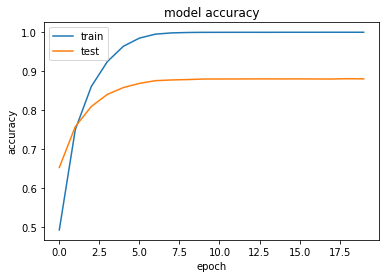

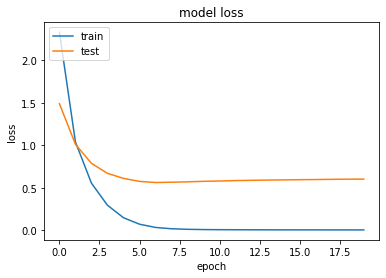

In [ ]:
i=0
print("================================== K Fold :",i,"==================================")

# Loading and concatenating deep features of 4 Models (VGG16 + ResNet50 + ResNet101 + DenseNet121) and labels of Fold-0
trainData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet101_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/VGG16_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/DenseNet121_PCA/trainFeatures_128_" + str(i) + ".npy")), axis = 1)

trainLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/trainLabels_128_" + str(i) + ".npy")

testData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet101_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/VGG16_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/DenseNet121_PCA/testFeatures_128_" + str(i) + ".npy")), axis = 1)

testLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/testLabels_128_" + str(i) + ".npy")

print("\nShape of Visual Features:")
print("Training Data Shape   = {}".format(trainData.shape))
print("Training Labels Shape = {}".format(trainLabels.shape))
print("Testing Data Shape   = {}".format(testData.shape))
print("Testing Labels Shape = {}\n".format(testLabels.shape))

# Model Training for Fold-0
visModel = visNeuralNetwork(trainData, trainLabels, testData, testLabels, 2048, 1024, 512, 20)

# Saving Trained Model of Fold-0
visModel.save("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/DCNN Models/CBC DCNN_Aug_CV/EnsembleModel_Visual/EnsembleModel_Overlap_Aug_PCA_128_" + str(i) + ".h5")

================================== K Fold : 1 ==================================

Shape of Visual Features:
Training Data Shape   = (260761, 2107)
Training Labels Shape = (260761, 264)
Testing Data Shape   = (65191, 2107)
Testing Labels Shape = (65191, 264)

Epoch 1/20
4075/4075 [==============================] - 46s 11ms/step - loss: 2.3307 - accuracy: 0.4938 - val_loss: 1.5593 - val_accuracy: 0.6422
Epoch 2/20
4075/4075 [==============================] - 42s 10ms/step - loss: 1.0356 - accuracy: 0.7513 - val_loss: 1.0181 - val_accuracy: 0.7594
Epoch 3/20
4075/4075 [==============================] - 39s 10ms/step - loss: 0.5550 - accuracy: 0.8603 - val_loss: 0.8121 - val_accuracy: 0.8036
Epoch 4/20
4075/4075 [==============================] - 39s 9ms/step - loss: 0.2956 - accuracy: 0.9237 - val_loss: 0.6932 - val_accuracy: 0.8358
Epoch 5/20
4075/4075 [==============================] - 39s 10ms/step - loss: 0.1477 - accuracy: 0.9634 - val_loss: 0.6231 - val_accuracy: 0.8554
Epoch 6/20
4

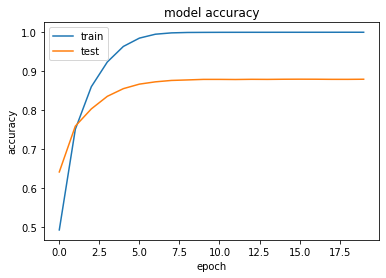

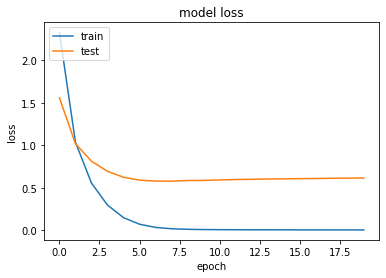

In [ ]:
i=1
print("================================== K Fold :",i,"==================================")

# Loading and concatenating deep features of 4 Models (VGG16 + ResNet50 + ResNet101 + DenseNet121) and labels of Fold-1
trainData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet101_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/VGG16_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/DenseNet121_PCA/trainFeatures_128_" + str(i) + ".npy")), axis = 1)

trainLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/trainLabels_128_" + str(i) + ".npy")

testData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet101_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/VGG16_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/DenseNet121_PCA/testFeatures_128_" + str(i) + ".npy")), axis = 1)

testLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/testLabels_128_" + str(i) + ".npy")

print("\nShape of Visual Features:")
print("Training Data Shape   = {}".format(trainData.shape))
print("Training Labels Shape = {}".format(trainLabels.shape))
print("Testing Data Shape   = {}".format(testData.shape))
print("Testing Labels Shape = {}\n".format(testLabels.shape))

# Model Training for Fold-1
visModel = visNeuralNetwork(trainData, trainLabels, testData, testLabels, 2048, 1024, 512, 20)

# Saving Trained Model of Fold-1
visModel.save("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/DCNN Models/CBC DCNN_Aug_CV/EnsembleModel_Visual/EnsembleModel_Overlap_Aug_PCA_128_" + str(i) + ".h5")

================================== K Fold : 2 ==================================

Shape of Visual Features:
Training Data Shape   = (260762, 2107)
Training Labels Shape = (260762, 264)
Testing Data Shape   = (65190, 2107)
Testing Labels Shape = (65190, 264)

Epoch 1/20
4075/4075 [==============================] - 47s 11ms/step - loss: 2.3258 - accuracy: 0.4949 - val_loss: 1.4958 - val_accuracy: 0.6529
Epoch 2/20
4075/4075 [==============================] - 42s 10ms/step - loss: 1.0292 - accuracy: 0.7526 - val_loss: 1.0318 - val_accuracy: 0.7550
Epoch 3/20
4075/4075 [==============================] - 38s 9ms/step - loss: 0.5482 - accuracy: 0.8612 - val_loss: 0.8138 - val_accuracy: 0.8056
Epoch 4/20
4075/4075 [==============================] - 40s 10ms/step - loss: 0.2879 - accuracy: 0.9257 - val_loss: 0.6665 - val_accuracy: 0.8408
Epoch 5/20
4075/4075 [==============================] - 40s 10ms/step - loss: 0.1444 - accuracy: 0.9646 - val_loss: 0.6126 - val_accuracy: 0.8582
Epoch 6/20
4

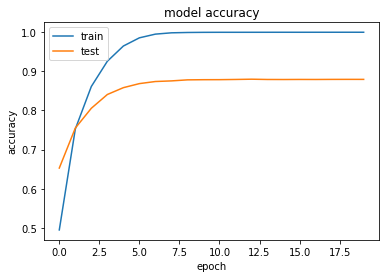

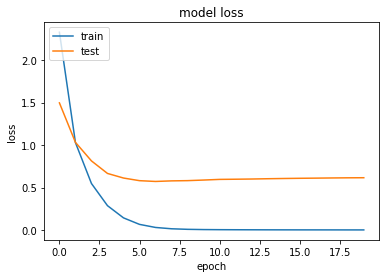

In [ ]:
i=2
print("================================== K Fold :",i,"==================================")

# Loading and concatenating deep features of 4 Models (VGG16 + ResNet50 + ResNet101 + DenseNet121) and labels of Fold-2
trainData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet101_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/VGG16_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/DenseNet121_PCA/trainFeatures_128_" + str(i) + ".npy")), axis = 1)

trainLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/trainLabels_128_" + str(i) + ".npy")

testData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet101_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/VGG16_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/DenseNet121_PCA/testFeatures_128_" + str(i) + ".npy")), axis = 1)

testLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/testLabels_128_" + str(i) + ".npy")

print("\nShape of Visual Features:")
print("Training Data Shape   = {}".format(trainData.shape))
print("Training Labels Shape = {}".format(trainLabels.shape))
print("Testing Data Shape   = {}".format(testData.shape))
print("Testing Labels Shape = {}\n".format(testLabels.shape))

# Model Training for Fold-2
visModel = visNeuralNetwork(trainData, trainLabels, testData, testLabels, 2048, 1024, 512, 20)

# Saving Trained Model of Fold-2
visModel.save("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/DCNN Models/CBC DCNN_Aug_CV/EnsembleModel_Visual/EnsembleModel_Overlap_Aug_PCA_128_" + str(i) + ".h5")

================================== K Fold : 3 ==================================

Shape of Visual Features:
Training Data Shape   = (260762, 2105)
Training Labels Shape = (260762, 264)
Testing Data Shape   = (65190, 2105)
Testing Labels Shape = (65190, 264)

Epoch 1/20
4075/4075 [==============================] - 43s 10ms/step - loss: 2.3339 - accuracy: 0.4935 - val_loss: 1.4845 - val_accuracy: 0.6584
Epoch 2/20
4075/4075 [==============================] - 39s 10ms/step - loss: 1.0418 - accuracy: 0.7501 - val_loss: 1.0139 - val_accuracy: 0.7578
Epoch 3/20
4075/4075 [==============================] - 38s 9ms/step - loss: 0.5625 - accuracy: 0.8577 - val_loss: 0.8016 - val_accuracy: 0.8099
Epoch 4/20
4075/4075 [==============================] - 38s 9ms/step - loss: 0.2995 - accuracy: 0.9228 - val_loss: 0.6843 - val_accuracy: 0.8384
Epoch 5/20
4075/4075 [==============================] - 39s 9ms/step - loss: 0.1498 - accuracy: 0.9627 - val_loss: 0.6098 - val_accuracy: 0.8582
Epoch 6/20
407

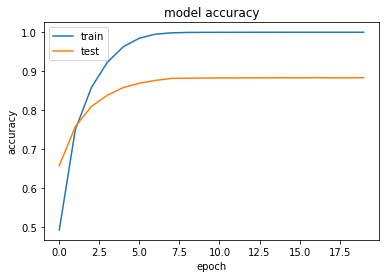

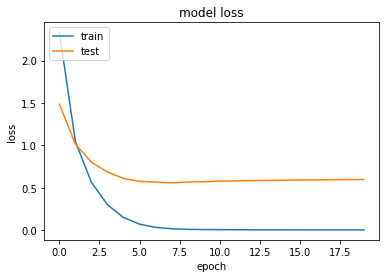

In [ ]:
i=3
print("================================== K Fold :",i,"==================================")

# Loading and concatenating deep features of 4 Models (VGG16 + ResNet50 + ResNet101 + DenseNet121) and labels of Fold-3
trainData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet101_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/VGG16_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/DenseNet121_PCA/trainFeatures_128_" + str(i) + ".npy")), axis = 1)

trainLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/trainLabels_128_" + str(i) + ".npy")

testData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet101_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/VGG16_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/DenseNet121_PCA/testFeatures_128_" + str(i) + ".npy")), axis = 1)

testLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/testLabels_128_" + str(i) + ".npy")

print("\nShape of Visual Features:")
print("Training Data Shape   = {}".format(trainData.shape))
print("Training Labels Shape = {}".format(trainLabels.shape))
print("Testing Data Shape   = {}".format(testData.shape))
print("Testing Labels Shape = {}\n".format(testLabels.shape))

# Model Training for Fold-3
visModel = visNeuralNetwork(trainData, trainLabels, testData, testLabels, 2048, 1024, 512, 20)

# Saving Trained Model of Fold-3
visModel.save("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/DCNN Models/CBC DCNN_Aug_CV/EnsembleModel_Visual/EnsembleModel_Overlap_Aug_PCA_128_" + str(i) + ".h5")

================================== K Fold : 4 ==================================

Shape of Visual Features:
Training Data Shape   = (260762, 2106)
Training Labels Shape = (260762, 264)
Testing Data Shape   = (65190, 2106)
Testing Labels Shape = (65190, 264)

Epoch 1/20
4075/4075 [==============================] - 43s 10ms/step - loss: 2.3337 - accuracy: 0.4933 - val_loss: 1.4820 - val_accuracy: 0.6607
Epoch 2/20
4075/4075 [==============================] - 41s 10ms/step - loss: 1.0345 - accuracy: 0.7525 - val_loss: 1.0289 - val_accuracy: 0.7556
Epoch 3/20
4075/4075 [==============================] - 40s 10ms/step - loss: 0.5555 - accuracy: 0.8602 - val_loss: 0.7887 - val_accuracy: 0.8113
Epoch 4/20
4075/4075 [==============================] - 41s 10ms/step - loss: 0.2939 - accuracy: 0.9240 - val_loss: 0.6922 - val_accuracy: 0.8334
Epoch 5/20
4075/4075 [==============================] - 40s 10ms/step - loss: 0.1470 - accuracy: 0.9635 - val_loss: 0.6128 - val_accuracy: 0.8561
Epoch 6/20


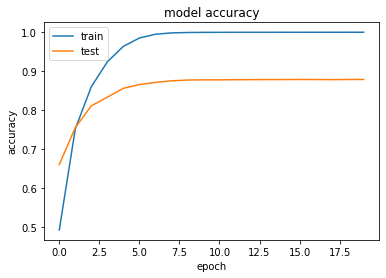

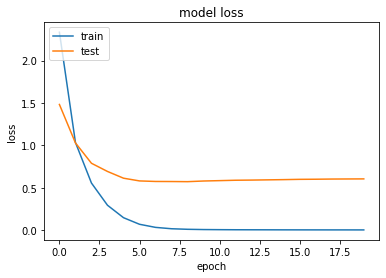

In [ ]:
i=4
print("================================== K Fold :",i,"==================================")

# Loading and concatenating deep features of 4 Models (VGG16 + ResNet50 + ResNet101 + DenseNet121) and labels of Fold-4
trainData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet101_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/VGG16_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/DenseNet121_PCA/trainFeatures_128_" + str(i) + ".npy")), axis = 1)

trainLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/trainLabels_128_" + str(i) + ".npy")

testData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet101_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/VGG16_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/DenseNet121_PCA/testFeatures_128_" + str(i) + ".npy")), axis = 1)

testLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/testLabels_128_" + str(i) + ".npy")

print("\nShape of Visual Features:")
print("Training Data Shape   = {}".format(trainData.shape))
print("Training Labels Shape = {}".format(trainLabels.shape))
print("Testing Data Shape   = {}".format(testData.shape))
print("Testing Labels Shape = {}\n".format(testLabels.shape))

# Model Training for Fold-4
visModel = visNeuralNetwork(trainData, trainLabels, testData, testLabels, 2048, 1024, 512, 20)

# Saving Trained Model of Fold-4
visModel.save("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/DCNN Models/CBC DCNN_Aug_CV/EnsembleModel_Visual/EnsembleModel_Overlap_Aug_PCA_128_" + str(i) + ".h5")

**Training & Testing Accuracies and Classification Reports**

In [ ]:
i=0
print("================================== K Fold :",i,"==================================\n")

# Loading and concatenating deep features of 4 Models (VGG16 + ResNet50 + ResNet101 + DenseNet121) and labels of Fold-0
trainData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet101_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/VGG16_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/DenseNet121_PCA/trainFeatures_128_" + str(i) + ".npy")), axis = 1)

trainLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/trainLabels_128_" + str(i) + ".npy")

testData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet101_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/VGG16_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/DenseNet121_PCA/testFeatures_128_" + str(i) + ".npy")), axis = 1)

testLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/testLabels_128_" + str(i) + ".npy")

# Loading Model of Fold-0
visModel = load_model("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/DCNN Models/CBC DCNN_Aug_CV/EnsembleModel_Visual/EnsembleModel_Overlap_Aug_PCA_128_" + str(i) + ".h5")

# Calculating Training and Testing Accuracy for Fold-0
_, trainAccuracy = visModel.evaluate(trainData, trainLabels)
del trainData, trainLabels

_, testAccuracy = visModel.evaluate(testData, testLabels)

print("\nTraining Accuracy = {}%".format(trainAccuracy*100))
print("Testing Accuracy = {}%".format(testAccuracy*100))

# Predicting Test labels for Fold-0
predictedTestLabels = visModel.predict(testData)

# Printing Classification Report for Fold-0
print("\nClassification Report: ")
print(classification_report(testLabels, np.round(predictedTestLabels)))

del testData, testLabels, predictedTestLabels

================================== K Fold : 0 ==================================

2038/2038 [==============================] - 11s 5ms/step - loss: 0.6007 - accuracy: 0.8801

Training Accuracy = 99.98312592506409%
Testing Accuracy = 88.01368474960327%

Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       402
           1       0.91      0.83      0.87        76
           2       0.90      0.90      0.90       171
           3       0.90      0.88      0.89       352
           4       0.91      0.89      0.90       370
           5       0.92      0.81      0.86       122
           6       0.85      0.87      0.86       135
           7       0.87      0.87      0.87       399
           8       0.95      0.91      0.93       437
           9       0.81      0.83      0.82        36
          10       0.98      0.95      0.96       294
          11       0.96      0.90      0.93       238
          12       0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
i=1
print("================================== K Fold :",i,"==================================\n")

# Loading and concatenating deep features of 4 Models (VGG16 + ResNet50 + ResNet101 + DenseNet121) and labels of Fold-1
trainData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet101_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/VGG16_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/DenseNet121_PCA/trainFeatures_128_" + str(i) + ".npy")), axis = 1)

trainLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/trainLabels_128_" + str(i) + ".npy")

testData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet101_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/VGG16_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/DenseNet121_PCA/testFeatures_128_" + str(i) + ".npy")), axis = 1)

testLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/testLabels_128_" + str(i) + ".npy")

# Loading Model of Fold-1
visModel = load_model("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/DCNN Models/CBC DCNN_Aug_CV/EnsembleModel_Visual/EnsembleModel_Overlap_Aug_PCA_128_" + str(i) + ".h5")

# Calculating Training and Testing Accuracy for Fold-1
_, trainAccuracy = visModel.evaluate(trainData, trainLabels)
del trainData, trainLabels

_, testAccuracy = visModel.evaluate(testData, testLabels)

print("\nTraining Accuracy = {}%".format(trainAccuracy*100))
print("Testing Accuracy = {}%".format(testAccuracy*100))

# Predicting Test labels for Fold-1
predictedTestLabels = visModel.predict(testData)

# Printing Classification Report for Fold-1
print("\nClassification Report: ")
print(classification_report(testLabels, np.round(predictedTestLabels)))

del testData, testLabels, predictedTestLabels

================================== K Fold : 1 ==================================

2038/2038 [==============================] - 11s 5ms/step - loss: 0.6145 - accuracy: 0.8795

Training Accuracy = 99.97315406799316%
Testing Accuracy = 87.94925808906555%

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       402
           1       0.93      0.93      0.93        75
           2       0.88      0.85      0.87       172
           3       0.92      0.89      0.90       352
           4       0.92      0.89      0.90       370
           5       0.86      0.88      0.87       122
           6       0.85      0.85      0.85       135
           7       0.90      0.88      0.89       399
           8       0.94      0.93      0.94       437
           9       0.78      0.86      0.82        36
          10       0.96      0.95      0.95       294
          11       0.92      0.91      0.92       237
          12       0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
i=2
print("================================== K Fold :",i,"==================================\n")

# Loading and concatenating deep features of 4 Models (VGG16 + ResNet50 + ResNet101 + DenseNet121) and labels of Fold-2
trainData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet101_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/VGG16_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/DenseNet121_PCA/trainFeatures_128_" + str(i) + ".npy")), axis = 1)

trainLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/trainLabels_128_" + str(i) + ".npy")

testData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet101_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/VGG16_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/DenseNet121_PCA/testFeatures_128_" + str(i) + ".npy")), axis = 1)

testLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/testLabels_128_" + str(i) + ".npy")

# Loading Model of Fold-2
visModel = load_model("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/DCNN Models/CBC DCNN_Aug_CV/EnsembleModel_Visual/EnsembleModel_Overlap_Aug_PCA_128_" + str(i) + ".h5")

# Calculating Training and Testing Accuracy for Fold-2
_, trainAccuracy = visModel.evaluate(trainData, trainLabels)
del trainData, trainLabels

_, testAccuracy = visModel.evaluate(testData, testLabels)

print("\nTraining Accuracy = {}%".format(trainAccuracy*100))
print("Testing Accuracy = {}%".format(testAccuracy*100))

# Predicting Test labels for Fold-2
predictedTestLabels = visModel.predict(testData)

# Printing Classification Report for Fold-2
print("\nClassification Report: ")
print(classification_report(testLabels, np.round(predictedTestLabels)))

del testData, testLabels, predictedTestLabels

================================== K Fold : 2 ==================================

2038/2038 [==============================] - 12s 6ms/step - loss: 0.6161 - accuracy: 0.8794

Training Accuracy = 99.98159408569336%
Testing Accuracy = 87.9368007183075%

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       402
           1       0.94      0.97      0.95        75
           2       0.92      0.85      0.89       172
           3       0.92      0.90      0.91       352
           4       0.90      0.87      0.89       370
           5       0.87      0.86      0.86       122
           6       0.89      0.86      0.88       135
           7       0.91      0.85      0.88       399
           8       0.93      0.91      0.92       436
           9       0.86      0.86      0.86        37
          10       0.96      0.92      0.94       294
          11       0.94      0.92      0.93       237
          12       0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
i=3
print("================================== K Fold :",i,"==================================\n")

# Loading and concatenating deep features of 4 Models (VGG16 + ResNet50 + ResNet101 + DenseNet121) and labels of Fold-3
trainData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet101_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/VGG16_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/DenseNet121_PCA/trainFeatures_128_" + str(i) + ".npy")), axis = 1)

trainLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/trainLabels_128_" + str(i) + ".npy")

testData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet101_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/VGG16_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/DenseNet121_PCA/testFeatures_128_" + str(i) + ".npy")), axis = 1)

testLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/testLabels_128_" + str(i) + ".npy")

# Loading Model of Fold-3
visModel = load_model("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/DCNN Models/CBC DCNN_Aug_CV/EnsembleModel_Visual/EnsembleModel_Overlap_Aug_PCA_128_" + str(i) + ".h5")

# Calculating Training and Testing Accuracy for Fold-3
_, trainAccuracy = visModel.evaluate(trainData, trainLabels)
del trainData, trainLabels

_, testAccuracy = visModel.evaluate(testData, testLabels)

print("\nTraining Accuracy = {}%".format(trainAccuracy*100))
print("Testing Accuracy = {}%".format(testAccuracy*100))

# Predicting Test labels for Fold-3
predictedTestLabels = visModel.predict(testData)

# Printing Classification Report for Fold-3
print("\nClassification Report: ")
print(classification_report(testLabels, np.round(predictedTestLabels)))

del testData, testLabels, predictedTestLabels

================================== K Fold : 3 ==================================

2038/2038 [==============================] - 10s 5ms/step - loss: 0.5970 - accuracy: 0.8833

Training Accuracy = 99.98350739479065%
Testing Accuracy = 88.32643032073975%

Classification Report: 


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      0.86      0.87       402
           1       0.90      0.93      0.92        75
           2       0.92      0.89      0.91       172
           3       0.89      0.89      0.89       352
           4       0.93      0.89      0.91       370
           5       0.89      0.84      0.86       122
           6       0.89      0.80      0.84       134
           7       0.91      0.89      0.90       400
           8       0.95      0.94      0.95       436
           9       0.93      0.73      0.82        37
          10       0.95      0.94      0.94       294
          11       0.93      0.90      0.92       237
          12       0.91      0.89      0.90       204
          13       0.94      0.93      0.93       545
          14       0.89      0.92      0.90        72
          15       0.91      0.82      0.86        71
          16       0.85      0.82      0.84       304
          17       0.96    

In [ ]:
i=4
print("================================== K Fold :",i,"==================================\n")

# Loading and concatenating deep features of 4 Models (VGG16 + ResNet50 + ResNet101 + DenseNet121) and labels of Fold-4
trainData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet101_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/VGG16_PCA/trainFeatures_128_" + str(i) + ".npy"),
                            np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/DenseNet121_PCA/trainFeatures_128_" + str(i) + ".npy")), axis = 1)

trainLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/trainLabels_128_" + str(i) + ".npy")

testData = np.concatenate((np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet101_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/VGG16_PCA/testFeatures_128_" + str(i) + ".npy"),
                           np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/DenseNet121_PCA/testFeatures_128_" + str(i) + ".npy")), axis = 1)

testLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Data Augmentation/Deep Features_Augment_CV/ResNet50_PCA/testLabels_128_" + str(i) + ".npy")

# Loading Model of Fold-4
visModel = load_model("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/DCNN Models/CBC DCNN_Aug_CV/EnsembleModel_Visual/EnsembleModel_Overlap_Aug_PCA_128_" + str(i) + ".h5")

# Calculating Training and Testing Accuracy for Fold-4
_, trainAccuracy = visModel.evaluate(trainData, trainLabels)
del trainData, trainLabels

_, testAccuracy = visModel.evaluate(testData, testLabels)

print("\nTraining Accuracy = {}%".format(trainAccuracy*100))
print("Testing Accuracy = {}%".format(testAccuracy*100))

# Predicting Test labels for Fold-4
predictedTestLabels = visModel.predict(testData)

# Printing Classification Report for Fold-4
print("\nClassification Report: ")
print(classification_report(testLabels, np.round(predictedTestLabels)))

del testData, testLabels, predictedTestLabels

================================== K Fold : 4 ==================================

2038/2038 [==============================] - 11s 5ms/step - loss: 0.6045 - accuracy: 0.8788

Training Accuracy = 99.97929334640503%
Testing Accuracy = 87.87697553634644%

Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       401
           1       0.91      0.91      0.91        76
           2       0.91      0.91      0.91       172
           3       0.90      0.88      0.89       352
           4       0.85      0.87      0.86       369
           5       0.88      0.75      0.81       122
           6       0.89      0.86      0.88       135
           7       0.92      0.87      0.89       399
           8       0.94      0.94      0.94       437
           9       0.88      0.81      0.84        36
          10       0.98      0.94      0.96       294
          11       0.90      0.92      0.91       238
          12       0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
